02. PyTorch Neural Network Classification


Classification problem: predicting whether/ differentiating one thing from another.
            1. binary classification (predict whether someone has a heart disease or not)

            2. multi-class classififcation (decide whether a photo is of zebra, impala,human)

            3. Multi-label classification (predict what categories should be assigned to given item)

1. Architecture of a classification neural network

    input layer shape(in_features) -> no. of features  -->>

    hiden layers -->>problem sp(mn=1, max=unlimited)

    neurons per hidden layer -->> prblm sp (generallly 10 to 512)

    output layer shape(out_features) -> either class -->> 1 per class fr multiclass

    hidden layer activation -->>ReLU(rectified linear unit)

    output activation  -->>sigmoid fr binary __>>softmax fr multiclass

    loss function -->>binary crossentropy fr binary--->> cross entropy fr multiclass


    optimizer -->>SGD (stochastic gradient descent)


1. Making classification data and getting it ready


using make_circles() method from Scikit-Learn, generate 2 circles with diff colored dots.

In [2]:
pip install scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
                                              0.0/8.3 MB 1.9 MB/s eta 0:00:05
       

In [5]:
from sklearn.datasets import make_circles
#make 1000 samples
n_samples = 1000
#create circles
X, Y = make_circles(n_samples,
                    noise=0.03, #NOISE TO THE DOTS
                    random_state=42) #to get the same values
                    

In [6]:
# view first 5 x and y values
print(f"First 5 X features: \n {X[:5]}")
print(f"First 5 Y labels: \n {Y[:5]}")

First 5 X features: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 Y labels: 
 [1 1 1 1 0]


In [7]:
#make a DataFrame of circle data
import pandas as pd
circles= pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label": Y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
#checking diff labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

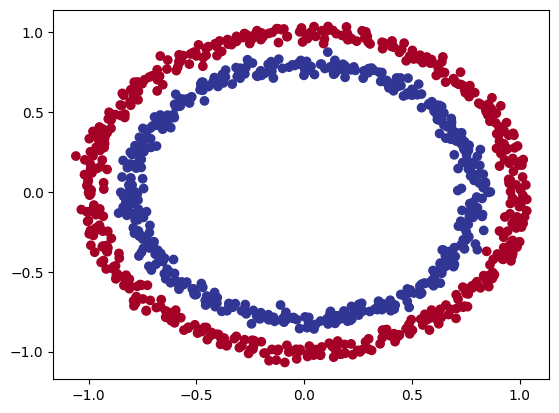

In [11]:
#visualize 
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y =X[:,1],
            c=Y,
            cmap = plt.cm.RdYlBu);

In [12]:
#1.1 Input & output shapes
#check the shapes of features and labels
X.shape, Y.shape


((1000, 2), (1000,))

In [16]:
#first example of features and labels
X_sample = X[0]
Y_sample = Y[0]
print(F"Values for one sample of X: {X_sample} and the same for Y: {Y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for Y: {Y_sample.shape} ")

Values for one sample of X: [0.75424625 0.23148074] and the same for Y: 1
Shapes for one sample of X: (2,) and the same for Y: () 


#1.2 Create tensors from the data and create train and test splits



In [17]:
#turning data into tensors
import torch
X =torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

#view the first 5 samples
X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [19]:
#USING train_test_split from scikit, split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(Y_train),len(X_test)

(800, 200, 800, 200)

2. Building a model

1.set up device agnostic Code

2. construct model by subclassing nn.Module

3.define loss funct and optiizer

4. create a training loop

In [20]:
import torch
from torch import nn
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Create a model class that:
        1. subclasses nn.Module
        2. creates nn.linear layers in the constructor tohandle input and output shapes of x&y
        3.  define a forward() method
        4.  instantiates the model class and sends it to the target device(cpu or gpu)


In [22]:
# subclass nn.Module class
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 nn.linear layers to handle x&y input&output shapes
        self.layer_1 = nn.Linear(in_features = 2, out_features=5)
        self.layer_2 = nn.Linear(in_features =5, out_features =1)
    #forward() method
    def forward (self,X):
        #return output of layer_2 a single feature the same shape as Y
        return self.layer_2(self.layer_1(X)) #go thru layer_1 first then the output of layer_1 goes thru layer_2
    
#create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0 

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
#making predictions on the model
untrained_preds = model_0(X_test.to(device))
print(f"length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"length of test sample: {len(Y_test)}, Shape: {Y_test.shape}")
print(f"\n First 10 predictions: \n {untrained_preds[:10]}")
print(f"\n First 10test labels: \n {Y_test[:10]}")

length of predictions: 200, Shape: torch.Size([200, 1])
length of test sample: 200, Shape: torch.Size([200])

 First 10 predictions: 
 tensor([[-0.0564],
        [-0.0758],
        [ 0.1585],
        [-0.1179],
        [ 0.4188],
        [ 0.4049],
        [ 0.1440],
        [ 0.2572],
        [ 0.1471],
        [-0.0742]], grad_fn=<SliceBackward0>)

 First 10test labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [24]:
#2.1 setting up loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

In [25]:
#calculate accuracy (a classification metric)
def accuracy_fn(Y_true, Y_pred):
    correct = torch.eq(Y_true, Y_pred).sum().item()#torch.eq calculates where two tensors are equal
    acc = (correct / len(Y_pred))*100
    return acc

3. Train Model

In [26]:
#view first 5 outputs of the forward pass on the test data
Y_logits = model_0(X_test.to(device))[:5]
Y_logits

tensor([[-0.0564],
        [-0.0758],
        [ 0.1585],
        [-0.1179],
        [ 0.4188]], grad_fn=<SliceBackward0>)

In [28]:
#use sigmoid on model logits
Y_pred_probs = torch.sigmoid(Y_logits)
Y_pred_probs

tensor([[0.4859],
        [0.4811],
        [0.5395],
        [0.4705],
        [0.6032]], grad_fn=<SigmoidBackward0>)

In [32]:
#find predicted labels/round the prediction probabilities
Y_preds = torch.round(Y_pred_probs)

Y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
#checking for equality
print(torch.eq(Y_preds.squeeze(),Y_pred_labels.squeeze()))
#getting rid of extra dimension
Y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.], grad_fn=<SqueezeBackward0>)

In [33]:
Y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [37]:
#3.2 Building training and testing loops
torch.manual_seed(42)
epochs= 100
#build training and evaluation loop
for epoch in range(epochs):
    model_0.train()

    #1.forward pass
    y_logits = model_0(X_train).squeeze() #squeeze to remove extra '1' dimensins
    Y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> predprobs ->pred labels
    #2.calc loss/accuracy
    loss = loss_fn(y_logits,Y_train)
    acc = accuracy_fn(Y_true=Y_train,Y_pred=Y_pred)
    #3.optimize zero grad
    optimizer.zero_grad()
    #4.loss backwards
    loss.backward()
    #5. step optimizer
    optimizer.step()
    
    
    #Testing
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #calc loss/accuracy
        test_loss = accuracy_fn(Y_true=Y_test, Y_pred=test_pred)
        test_acc = accuracy_fn(Y_true=Y_test, Y_pred=test_pred)
    #print out chenye inahappen every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} |Loss:{loss:.5f}, Accuracy:{acc:.2f}% | Test loss: {test_loss:.5f}. Test acc: {test_acc:.2f}%")

Epoch:0 |Loss:0.70178, Accuracy:51.38% | Test loss: 55.50000. Test acc: 55.50%
Epoch:10 |Loss:0.69775, Accuracy:51.88% | Test loss: 49.50000. Test acc: 49.50%
Epoch:20 |Loss:0.69622, Accuracy:50.75% | Test loss: 48.50000. Test acc: 48.50%
Epoch:30 |Loss:0.69548, Accuracy:50.38% | Test loss: 49.00000. Test acc: 49.00%
Epoch:40 |Loss:0.69504, Accuracy:50.00% | Test loss: 48.00000. Test acc: 48.00%
Epoch:50 |Loss:0.69472, Accuracy:50.62% | Test loss: 47.00000. Test acc: 47.00%
Epoch:60 |Loss:0.69449, Accuracy:50.62% | Test loss: 45.50000. Test acc: 45.50%
Epoch:70 |Loss:0.69430, Accuracy:50.12% | Test loss: 47.50000. Test acc: 47.50%
Epoch:80 |Loss:0.69415, Accuracy:50.12% | Test loss: 49.00000. Test acc: 49.00%
Epoch:90 |Loss:0.69403, Accuracy:49.25% | Test loss: 51.00000. Test acc: 51.00%


4.Making Predictions and evaluate the model

In [41]:
import requests
from pathlib import Path
#downloading helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping download")
else:
    print("Downloading helper_functions.py")
    request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open ("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exist, skipping download


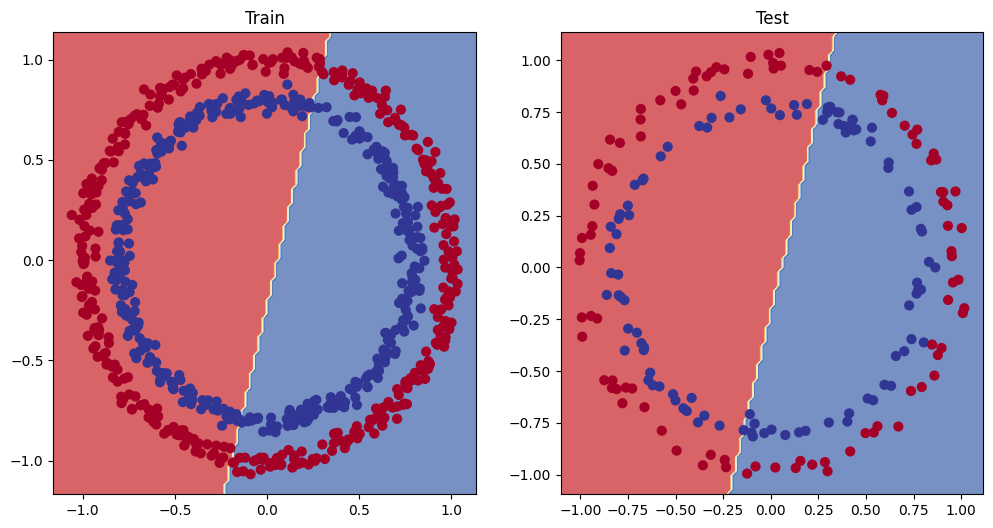

In [42]:
#plot decions boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, Y_test)

from above, model is trying to split data using a straight line, which is underfitting since our data is circular

5. Improving a model (model approach)
.   .   .

6. Non-linearity


(give the model capacity to draw non-linear lines)

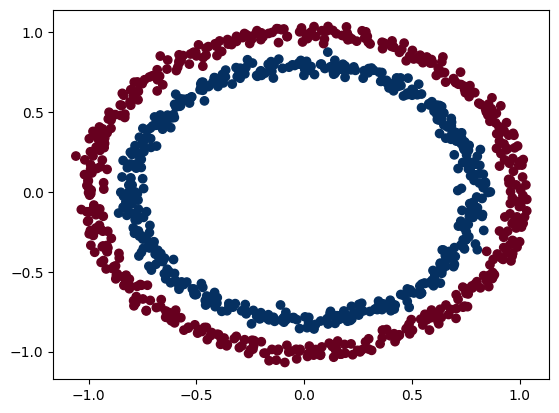

In [44]:
#6.1 Recreating non-linear data (re&blue circles)
#to start off fresh, recreate the data
#make&plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =1000
X, Y = make_circles(n_samples=1000, noise = 0.03, random_state=42)
plt.scatter(X[:,0],X[:,1], c = Y, cmap=plt.cm.RdBu);



In [45]:
#converting into tensors and splitting into  train and test sets
import torch
from sklearn.model_selection import train_test_split
#numpy data into tensors
X= torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)
#splitting
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train[:5], Y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [46]:
#Building a model with non-linearity
#build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() 
    
    def forward(self,X):
        #interface the ReLU activation functionbetween layers
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))
    
model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [47]:
#loss and optimizer function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


In [52]:
#Training a model with non-linearity
#fitting the model
torch.manual_seed(42)
epochs = 1000
for epoch in range (epochs):
    #forward pass
    y_logits= model_3(X_train).squeeze()
    Y_pred = torch.round(torch.sigmoid(y_logits)) #logits ->> prediction probs ->> prediction labels
    #calc loss and accuracy
    loss=loss_fn(y_logits,Y_train) #BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(Y_true=Y_train, Y_pred=Y_pred)
    #optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()


    ##Testing
    model_3.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #calculate loss and accuracy
        test_loss = loss_fn(test_logits, Y_test)
        test_acc = accuracy_fn(Y_true=Y_test, Y_pred=test_pred)
    #print progress
    if epoch % 100 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69284, Accuracy: 50.00% | Test Loss: 0.69305, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69113, Accuracy: 53.12% | Test Loss: 0.69099, Test Accuracy: 53.00%
Epoch: 200 | Loss: 0.68974, Accuracy: 53.50% | Test Loss: 0.68936, Test Accuracy: 55.50%
Epoch: 300 | Loss: 0.68791, Accuracy: 53.00% | Test Loss: 0.68718, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68510, Accuracy: 52.75% | Test Loss: 0.68404, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68092, Accuracy: 52.75% | Test Loss: 0.67930, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67501, Accuracy: 54.62% | Test Loss: 0.67270, Test Accuracy: 56.50%
Epoch: 700 | Loss: 0.66637, Accuracy: 58.38% | Test Loss: 0.66298, Test Accuracy: 59.50%
Epoch: 800 | Loss: 0.65121, Accuracy: 64.25% | Test Loss: 0.64718, Test Accuracy: 68.00%
Epoch: 900 | Loss: 0.62284, Accuracy: 74.00% | Test Loss: 0.62076, Test Accuracy: 79.00%


In [55]:
#6.4 Evaluating the non-linear trained model
#making predictions
model_3.eval()
with torch.inference_mode():
    Y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
Y_preds[:10], Y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

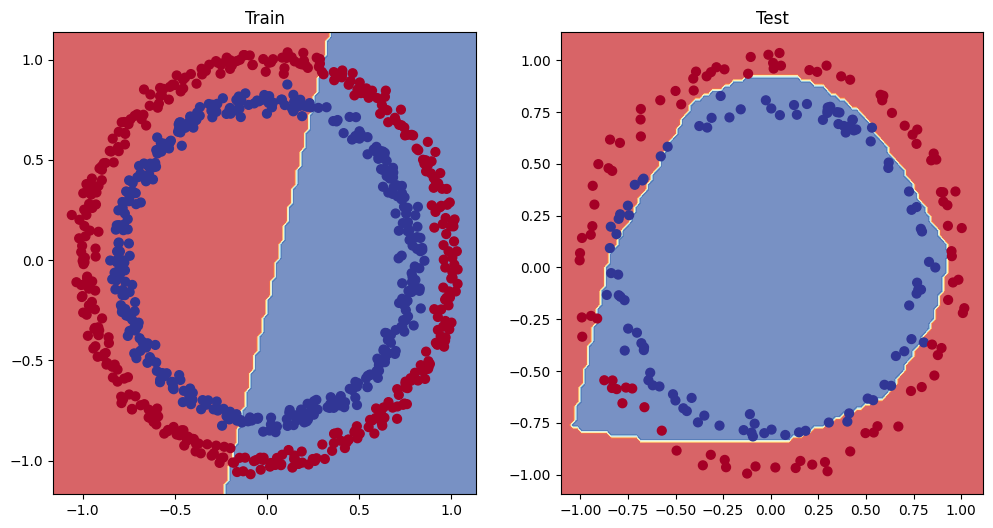

In [61]:
#PLOT DECISION BOUNDARIES FRO TRAINING AND TESTING SETS
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train) #model_1 == no non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, Y_test) #model_3 == non-linearity

8. Putting all together: Building a multi-class PyTorch model